In [1]:
#Description: This program predicts the price of intel stock for a specific day using ML algorithms
#import lib
import time
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df = pd.read_csv('INTC_1y.csv')
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/9/2020,51.919998,52.709999,50.000000,50.849998,49.559795,56197000,0
1,3/10/2020,52.759998,54.000000,50.430000,53.980000,52.610378,36569000,1
2,3/11/2020,52.389999,53.540001,51.009998,51.660000,50.349247,38563500,2
3,3/12/2020,47.990002,50.090000,45.369999,45.540001,44.384529,50661700,3
4,3/13/2020,48.259998,55.000000,47.740002,54.430000,53.048958,48805100,4
...,...,...,...,...,...,...,...,...
246,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,246
247,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,247
248,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,248
249,3/4/2021,59.830002,60.240002,57.910000,58.330002,58.330002,40044900,249


In [2]:
#Show the last row of data
actual_price = df.tail(1)
#Show the data
actual_price


,Date,Open,High,Low,Close,Adj Close,Volume,index
250,3/5/2021,59.259998,61.18,58.509998,60.740002,60.740002,39501700,250


In [3]:
#Get all of the data except the last row
df = df.head(len(df)-1)
#show
df


,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/9/2020,51.919998,52.709999,50.000000,50.849998,49.559795,56197000,0
1,3/10/2020,52.759998,54.000000,50.430000,53.980000,52.610378,36569000,1
2,3/11/2020,52.389999,53.540001,51.009998,51.660000,50.349247,38563500,2
3,3/12/2020,47.990002,50.090000,45.369999,45.540001,44.384529,50661700,3
4,3/13/2020,48.259998,55.000000,47.740002,54.430000,53.048958,48805100,4
...,...,...,...,...,...,...,...,...
245,2/26/2021,60.889999,61.689999,59.680000,60.779999,60.779999,38210400,245
246,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,246
247,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,247
248,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,248


In [4]:
# Create empty list 
days = list()
adj_close_prices = list()
#Get only the date and the adjusted close prices
df_days = df.loc[:,'index']
#show
df_days


0        0
1        1
2        2
3        3
4        4
      ... 
245    245
246    246
247    247
248    248
249    249
Name: index, Length: 250, dtype: int64

In [5]:

df_adj_close = df.loc[:,'Adj Close']
#show
df_adj_close

0      49.559795
1      52.610378
2      50.349247
3      44.384529
4      53.048958
         ...    
245    60.779999
246    62.880001
247    61.240002
248    59.900002
249    58.330002
Name: Adj Close, Length: 250, dtype: float64

In [6]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(day)])
# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))


In [7]:
rbf_svr = SVR(kernel='rbf', C = 10000.0, gamma=0.5)
x = time.perf_counter()
rbf_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

0.012426799999999849


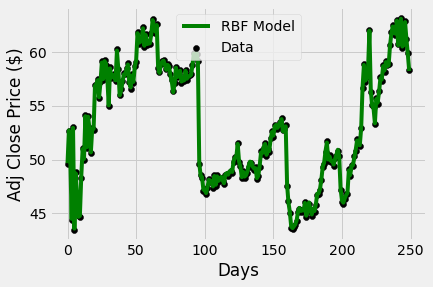

In [8]:
plt.scatter(days, adj_close_prices,color="black", label="Data")
plt.plot(days, rbf_svr.predict(days), color = "green", label = "RBF Model")
#plt.plot(days, poly_svr.predict(days), color = "orange", label = "Polynomial Model")
#plt.plot(days, lin_svr.predict(days), color = "blue", label = "Linear Model")
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [10]:
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume,index
250,3/5/2021,59.259998,61.18,58.509998,60.740002,60.740002,39501700,250


In [11]:
print(rbf_svr.predict([[250]]))

[55.36949511]


In [12]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume,index
249,3/4/2021,59.830002,60.240002,57.91,58.330002,58.330002,40044900,249


In [13]:
print(rbf_svr.predict([[249]]))

[58.22981902]
